In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import warnings 

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Kategorik Değişken

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
[cols for cols in data.columns if data[cols].dtypes == 'object']

[]

In [6]:
[cols for cols in data.columns if data[cols].dtypes != 'object'
and data[cols].nunique() < 5]

['Outcome']

Kategorik Değişken : []
Kategorik Değişken Sayısı : 0
Numeric Ama Kategorik Değişken : ['Outcome']
Numeric Ama Kategorik Değişken Sayısı : 1
Numeric Değişken : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Numeric Değişken Sayısı : 8

   Outcome      Oran
0      500  0.651042
1      268  0.348958


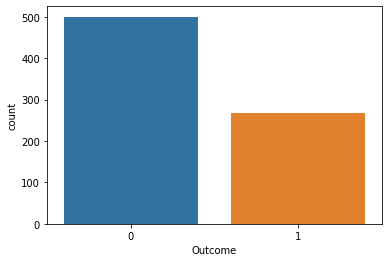

In [7]:
import seaborn as sns

def features_analysis(df, number = 5, plot = False):
    
    cat = [cols for cols in df.columns if df[cols].dtypes == 'object']
    
    num_but_cat = [cols for cols in df.columns if df[cols].dtypes != 'object'
                   and df[cols].nunique() < int(number)]
    
    num = [cols for cols in df.columns if df[cols].dtypes != 'object'
          and cols not in num_but_cat]
    
    print(f"Kategorik Değişken : {cat}\nKategorik Değişken Sayısı : {len(cat)}")
    print(f"Numeric Ama Kategorik Değişken : {num_but_cat}\nNumeric Ama Kategorik Değişken Sayısı : {len(num_but_cat)}")
    print(f"Numeric Değişken : {num}\nNumeric Değişken Sayısı : {len(num)}", end= "\n\n")

    for cols in num_but_cat:
            
            data_new = pd.DataFrame({cols:df[cols].value_counts(),
                                     'Oran':np.divide(df[cols].value_counts(), len(df))})
            
            print(f"{data_new}", end = "\n")
            
            if plot:
                
                sns.countplot(x=cols, data = df)
            
features_analysis(data, number = 5, plot = True)

# Numeric Değer ve Numeric Değişken

#################### Pregnancies #######################

 Kaç Farklı Değeri Var : 17


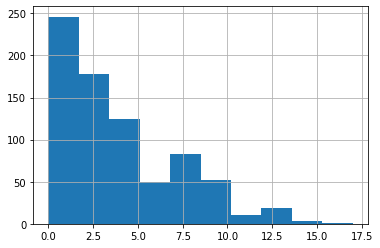

#################### Glucose #######################

 Kaç Farklı Değeri Var : 136


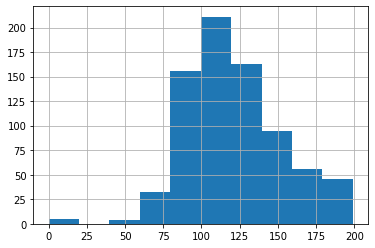

#################### BloodPressure #######################

 Kaç Farklı Değeri Var : 47


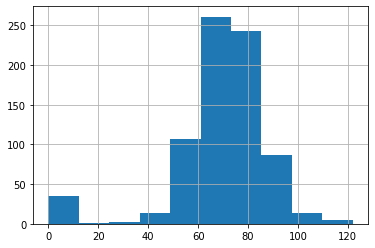

#################### SkinThickness #######################

 Kaç Farklı Değeri Var : 51


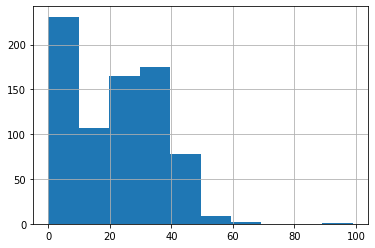

#################### Insulin #######################

 Kaç Farklı Değeri Var : 186


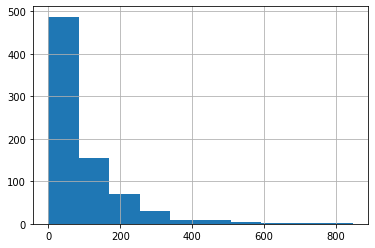

#################### BMI #######################

 Kaç Farklı Değeri Var : 248


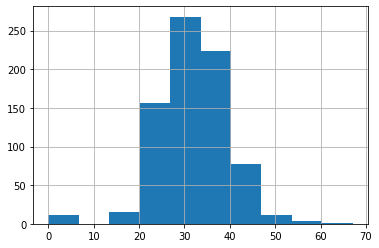

#################### DiabetesPedigreeFunction #######################

 Kaç Farklı Değeri Var : 517


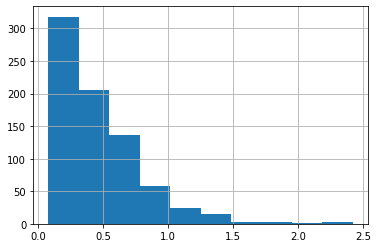

#################### Age #######################

 Kaç Farklı Değeri Var : 52


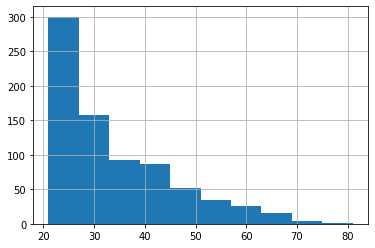

In [8]:
import matplotlib.pyplot as plt

def numeric(df, plot = False):
    
    num_cols = [cols for cols in df.columns if df[cols].dtypes != 'object'
          and cols not in 'Outcome']
    
    for cols in num_cols:
        
        if plot:
            
            print(f"#################### {df[cols].name} #######################", end = "\n\n")
            print(f" Kaç Farklı Değeri Var : {df[cols].value_counts().count()}")
            df[cols].hist()
            plt.show()

numeric(data, plot = True)

# Sayısal Değer

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
data[['Pregnancies','Glucose']].corr().loc['Pregnancies','Glucose']

0.12945867149927248

In [12]:
def korelasyon(df, target = 'Outcome', corr_limit = 0.50):
    
    high = []
    low = []
    
    num_cols = [cols for cols in df.columns if df[cols].dtypes != 'object'
               and cols not in 'Outcome']
    
    for cols in num_cols:
        
        corr_score = df[[cols,target]].corr().loc[cols,target]
        
        if abs(corr_score) > corr_limit:
            
            high.append(cols + " = " + str(corr_score))
        else:
            low.append(cols + " = " + str(corr_score))
        
    cache = {'Düşük Korelasyonlu Değişkenler':low,
            'Yüksek Korelasyonlu Değğişkenler': high
            }
    
    return cache

    
korelasyon(data, target = 'Outcome', corr_limit = 0.50)    

{'Düşük Korelasyonlu Değişkenler': ['Pregnancies = 0.22189815303398636',
  'Glucose = 0.46658139830687373',
  'BloodPressure = 0.06506835955033277',
  'SkinThickness = 0.07475223191831946',
  'Insulin = 0.13054795488404794',
  'BMI = 0.2926946626444454',
  'DiabetesPedigreeFunction = 0.17384406565296004',
  'Age = 0.23835598302719757'],
 'Yüksek Korelasyonlu Değğişkenler': []}

# Missing Values

In [13]:
data.isnull().any().sum()

0

In [14]:
data['Outcome'].isnull().any()

False

In [15]:
def Missing(df):
    
    miss = []
    no_miss = []
    
    columns = df.columns
    
    for cols in columns:
        
        miss_count = df[cols].isnull().any().sum()
        
        if miss_count > 0:
            
            miss.append(cols)
        else:
            no_miss.append(cols)
    
    cache = {'Eksik Değere Sahip Değişkenler': miss,
            'Eksik Değere Sahip Olmayan Değişkenler': no_miss
            }
    
    return cache

Missing(data)

{'Eksik Değere Sahip Değişkenler': [],
 'Eksik Değere Sahip Olmayan Değişkenler': ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Outcome']}

# New Feature 

- **Pregnancies** değişkenini kullanarak yeni **Child** değişkenimizi elde ediyoruz.

In [16]:
data.loc[(data['Pregnancies'] > 0), 'Child'] = 1

data.loc[(data['Pregnancies'] <= 0 ), 'Child'] = 0

data['Child'] = data['Child'].astype('int')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


- **Pregnancies** değişkenini kullanarak yeni **pregcat** değişkenimizi elde ediyoruz.

In [17]:
data['pregcat'] = np.where(data['Pregnancies'] == 0, "No", "1-3")

data['pregcat'] = np.where((data['Pregnancies'] > 3) & (data['Pregnancies'] < 10), "4-9", data['pregcat'])

data['pregcat'] = np.where((data['Pregnancies'] >= 10), "10+", data['pregcat'])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child,pregcat
0,6,148,72,35,0,33.6,0.627,50,1,1,4-9
1,1,85,66,29,0,26.6,0.351,31,0,1,1-3
2,8,183,64,0,0,23.3,0.672,32,1,1,4-9
3,1,89,66,23,94,28.1,0.167,21,0,1,1-3
4,0,137,40,35,168,43.1,2.288,33,1,0,No


- **Glucose** değişkenimizi kullanarak yeni **Hypogly** değişkenimizi elde ediyoruz

In [18]:
data['Hypogly'] = np.where(data['Glucose'] > 75, 1,0)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child,pregcat,Hypogly
0,6,148,72,35,0,33.6,0.627,50,1,1,4-9,1
1,1,85,66,29,0,26.6,0.351,31,0,1,1-3,1
2,8,183,64,0,0,23.3,0.672,32,1,1,4-9,1
3,1,89,66,23,94,28.1,0.167,21,0,1,1-3,1
4,0,137,40,35,168,43.1,2.288,33,1,0,No,1


- **Age** değişkenimizi ve **BMI(Vücut kitle indeksi)** değişkenimizi kullanarak **Risk** adından yeni değişken elde edeceğiz.

In [19]:
data['Risk'] = np.where(data['Age'] < 35, 0 ,20)

data['Risk'] = np.where(data['Age'] > 49, 30, data['Risk'])

data['Risk'] = np.where(data['BMI'] < 30, 0, 10) #Age değişkeninde de 35 altındakiler 0 olsun demiştik

data['Risk'] = np.where((data['BMI'] >= 45) & (data['BMI'] < 55), 20, data['Risk'])

data['Risk'] = np.where((data['Age'] >= 55), 30, data['Risk']) #Age değişkeninde 49 üstündeki değerler 30 olsun dedik.

data.head(n=8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child,pregcat,Hypogly,Risk
0,6,148,72,35,0,33.6,0.627,50,1,1,4-9,1,10
1,1,85,66,29,0,26.6,0.351,31,0,1,1-3,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,4-9,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,1-3,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,No,1,10
5,5,116,74,0,0,25.6,0.201,30,0,1,4-9,1,0
6,3,78,50,32,88,31.0,0.248,26,1,1,1-3,1,10
7,10,115,0,0,0,35.3,0.134,29,0,1,10+,1,10


# One Hot Encoder

In [20]:
[cols for cols in data.columns if data[cols].nunique() < 5
and cols not in 'Outcome']

['Child', 'pregcat', 'Hypogly', 'Risk']

In [21]:
def onehot(df,target = 'Outcome', number = 5):
    
    cat_cols = [cols for cols in df.columns if df[cols].nunique() < int(number)
               and cols not in target]
    
    
    df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
    
    return df
    
onehot(data, target = 'Outcome', number= 5)    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child_1,pregcat_10+,pregcat_4-9,pregcat_No,Hypogly_1,Risk_10,Risk_20,Risk_30
0,6,148,72,35,0,33.6,0.627,50,1,1,0,1,0,1,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0,1,0,1,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0,0,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,1,0,0,1,0,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1,0,0,0,1,1,0,0
765,5,121,72,23,112,26.2,0.245,30,0,1,0,1,0,1,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1,0,0,0,1,1,0,0


In [22]:
data = onehot(data,'Outcome',5)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child_1,pregcat_10+,pregcat_4-9,pregcat_No,Hypogly_1,Risk_10,Risk_20,Risk_30
0,6,148,72,35,0,33.6,0.627,50,1,1,0,1,0,1,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0,1,0,1,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0,0,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,1,1,1,0,0


# Data Preprocessing

In [23]:
y = data['Outcome']
x = data.drop('Outcome', axis=1)

In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Child_1,pregcat_10+,pregcat_4-9,pregcat_No,Hypogly_1,Risk_10,Risk_20,Risk_30
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,1,1,0,0
1,1,85,66,29,0,26.6,0.351,31,1,0,0,0,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0,1,0,1,0,0,0
3,1,89,66,23,94,28.1,0.167,21,1,0,0,0,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,1,0,0,1,0,0,1
764,2,122,70,27,0,36.8,0.340,27,1,0,0,0,1,1,0,0
765,5,121,72,23,112,26.2,0.245,30,1,0,1,0,1,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0,0,0,1,1,0,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def train_test(X, Y, size = 0.33):
    
    x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size = size, random_state = 18)
    
    min_max = MinMaxScaler()
    
    x_train = min_max.fit_transform(x_train)
    x_test = min_max.fit_transform(x_test)
       
    return x_train, x_test, y_train, y_test
    

x_train, x_test, y_train, y_test = train_test(X= x, Y= y, size = 0.33)

In [27]:
x_train

array([[0.23529412, 0.27972028, 0.45901639, ..., 0.        , 0.        ,
        0.        ],
       [0.52941176, 0.6993007 , 0.70491803, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.44055944, 0.52459016, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.74125874, 0.62295082, ..., 0.        , 1.        ,
        0.        ],
       [0.11764706, 0.30769231, 0.57377049, ..., 1.        , 0.        ,
        0.        ],
       [0.82352941, 0.30769231, 0.63934426, ..., 1.        , 0.        ,
        0.        ]])

In [28]:
x_test

array([[0.61538462, 0.50505051, 0.64912281, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.69191919, 0.59649123, ..., 0.        , 0.        ,
        0.        ],
       [0.92307692, 0.50505051, 0.73684211, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.30769231, 0.62121212, 0.70175439, ..., 1.        , 0.        ,
        0.        ],
       [0.76923077, 0.45454545, 0.74561404, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.51515152, 0.75438596, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((514, 16), (254, 16), (514,), (254,))

# Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

models = [('LR', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('DTC', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('GBC',GradientBoostingClassifier()),
        ('LGB', LGBMClassifier()),
        ('XGB', XGBClassifier())]


def Model(train_x, train_y, cv = 10, plot = False):
    
    scores = []
    
    for name,model in models:
        
        cvs = cross_val_score(model, train_x, train_y, cv = cv, scoring = 'accuracy')
        
        scores.append((name,cvs.mean()))
    
    return scores
            
score = Model(x_train,y_train,cv=10)
score

[14:55:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[('LR', 0.7821644042232279),
 ('KNN', 0.7432880844645551),
 ('DTC', 0.7158371040723983),
 ('RF', 0.7761689291101056),
 ('GBC', 0.7665158371040723),
 ('LGB', 0.7607466063348416),
 ('XGB', 0.7450980392156863)]

Feature Engineering Yapmadan Score'lar:

[('LR', 0.7782805429864255), ('KNN', 0.7607843137254902), ('DTC', 0.7196832579185521), ('RF', 0.7645550527903469)]

# Model Tuning

- models listemiz içerisinden **LogisticRegression** modelimizi alıyoruz

In [31]:
log_Reg = models[0][1]

log_Reg.fit(x_train, y_train)

LogisticRegression()

- Logistic Regression modelimiz için hiperparametre ayarlayacağız

- **penalty, solver, C** parametrelerini gridSearchCv ile en iyi değerlerini bulacağız

In [35]:
from sklearn.model_selection import GridSearchCV

def ModelTuning(model, X, y, params, cv=10):
    
    grid_cv = GridSearchCV(estimator = model,param_grid = params, cv = cv)
    
    grid_model = grid_cv.fit(X,y)
    
    best_params = grid_model.best_params_
    
    means = grid_model.cv_results_['mean_test_score']
    
    stds = grid_model.cv_results_['std_test_score']
    
    params = grid_model.cv_results_['params']
    
    for mean, std, param in zip(means,stds,params):
        
        print(f"{mean}, {std}, {param}")
    
    return best_params 

gbc_params = {'penalty':['l1','l2','elasticnet'],
             'C':[0.5,0.75,1.0,1.25,1.5],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

ModelTuning(model = log_Reg, X = x_train,y = y_train, params = gbc_params, cv= 10)

nan, nan, {'C': 0.5, 'penalty': 'l1', 'solver': 'newton-cg'}
nan, nan, {'C': 0.5, 'penalty': 'l1', 'solver': 'lbfgs'}
0.7821644042232277, 0.061897586237992595, {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
nan, nan, {'C': 0.5, 'penalty': 'l1', 'solver': 'sag'}
0.7821644042232277, 0.05753808041064778, {'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}
0.7762066365007542, 0.035214847134563736, {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7762066365007542, 0.035214847134563736, {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7743589743589743, 0.044761452223217556, {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
0.7762066365007542, 0.035214847134563736, {'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}
0.7762066365007542, 0.035214847134563736, {'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}
nan, nan, {'C': 0.5, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan, nan, {'C': 0.5, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan, nan, {'C': 0.5, 'penalty': 'elasticnet', 'solver': 'liblin

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [34]:
def BestModel(X,y,cv=10):
    
    log_reg = LogisticRegression(C=1.0, penalty='l2', solver = 'newton-cg')
    
    cvs = cross_val_score(log_reg,X,y, cv=cv, scoring = 'accuracy')
    
    return cvs.mean()
    
BestModel(x_train,y_train)

0.7821644042232279